In [2]:
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Important comments/resume
We should maybe select a higher treshold for VPD because its relationship with GPP is not clear

Also wondering if we should use an other indicator than GPP (NPP, SIF...)

We however see that SM is more discriminant than VPD, but might be due to the things discussed above.

# Load data

In [14]:
cha_mat= h5py.File("CHAMAU.mat", 'r')
cha_mat

<HDF5 file "CHAMAU.mat" (mode r)>

In [15]:
cha = pd.DataFrame(
    { 
        #'NPP': cha_mat['NPP_L'][:].squeeze(), #Net primary production for low vegetation calculated each day with the T&C model
        'Ta': cha_mat['Ta'][:].squeeze(),
        'VPD': cha_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_mat['OF'][:].squeeze(), # first soil layer (surface)
        #'SIF':cha_mat['SIF_L'][:].squeeze() #CHA=grassland--> low vegetation # valeurs chaque jour donc on ajoute après
    }
)
cha

,Ta,VPD,SM
0,2.2570,6.134699,0.000000
1,2.2945,6.069162,0.430071
2,2.2490,13.289646,0.428790
3,2.3290,17.970873,0.428313
4,2.7175,15.666741,0.428256
...,...,...,...
87643,-9.0715,11.282861,0.214186
87644,-9.7030,13.785815,0.212035
87645,-10.7695,15.669038,0.210431
87646,-9.3050,13.607474,0.208364


In [16]:
start_date = '2005-01-01 00:00:00' #pour trouver la date de début: matlab/inputs/timestamp
#2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')
cha['Date'] = date_range
cha['Date_day'] = cha['Date'].dt.date
cha['Year'] = cha['Date'].dt.year
cha['Month'] = cha['Date'].dt.month
cha['Day'] = cha['Date'].dt.day
cha['Hour'] = cha['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans CHAMAU alors qu'elles vont jusqu'à 2023 dans les données de base
cha

C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\833172632.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')


,Ta,VPD,SM,Date,Date_day,Year,Month,Day,Hour
0,2.2570,6.134699,0.000000,2005-01-01 00:00:00,2005-01-01,2005,1,1,0
1,2.2945,6.069162,0.430071,2005-01-01 01:00:00,2005-01-01,2005,1,1,1
2,2.2490,13.289646,0.428790,2005-01-01 02:00:00,2005-01-01,2005,1,1,2
3,2.3290,17.970873,0.428313,2005-01-01 03:00:00,2005-01-01,2005,1,1,3
4,2.7175,15.666741,0.428256,2005-01-01 04:00:00,2005-01-01,2005,1,1,4
...,...,...,...,...,...,...,...,...,...
87643,-9.0715,11.282861,0.214186,2014-12-31 19:00:00,2014-12-31,2014,12,31,19
87644,-9.7030,13.785815,0.212035,2014-12-31 20:00:00,2014-12-31,2014,12,31,20
87645,-10.7695,15.669038,0.210431,2014-12-31 21:00:00,2014-12-31,2014,12,31,21
87646,-9.3050,13.607474,0.208364,2014-12-31 22:00:00,2014-12-31,2014,12,31,22


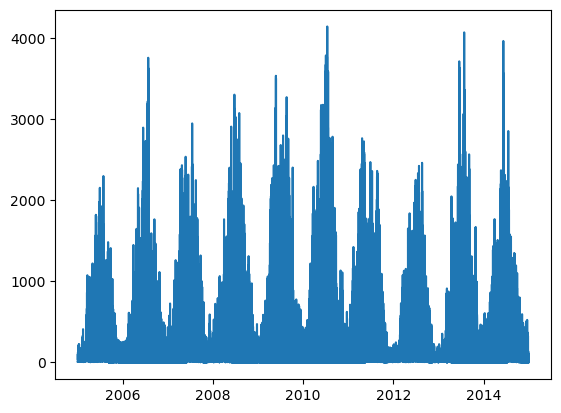

In [56]:
plt.plot(cha['Date'], cha['VPD'])

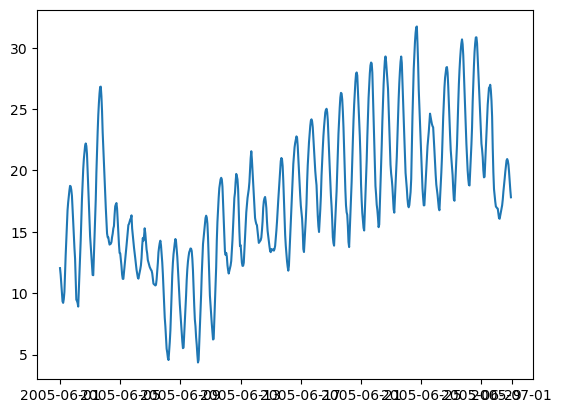

In [17]:
cha_2005 = cha[(cha['Year'] == 2005) & (cha['Month'] == 6)]

# Graphe GPP vs Date pour juin 2005
plt.figure()
plt.plot(cha_2005['Date'], cha_2005['Ta'])

# Daily mean

In [18]:
# Groupby day to have daily mean
cha_daily = cha.groupby('Date_day')[['Ta','VPD','SM']].mean().reset_index()

#rearrange
cha_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_daily['Date'] = pd.to_datetime(cha_daily['Date'])
cha_daily['Year'] = cha_daily['Date'].dt.year
cha_daily['Month'] = cha_daily['Date'].dt.month
cha_daily['Day'] = cha_daily['Date'].dt.day

cha_daily

,Date,Ta,VPD,SM,Year,Month,Day
0,2005-01-01,3.506875,34.552570,0.405759,2005,1,1
1,2005-01-02,4.580042,64.360370,0.427769,2005,1,2
2,2005-01-03,1.560708,65.971632,0.427691,2005,1,3
3,2005-01-04,1.037062,58.476064,0.412771,2005,1,4
4,2005-01-05,2.516396,69.353332,0.395775,2005,1,5
...,...,...,...,...,...,...,...
3647,2014-12-27,0.382771,45.870856,0.249852,2014,12,27
3648,2014-12-28,-0.905813,55.236311,0.256427,2014,12,28
3649,2014-12-29,-7.178979,30.106732,0.144904,2014,12,29
3650,2014-12-30,-2.971437,7.094880,0.177588,2014,12,30


In [30]:
cha_mat['NPP_L'][:]

array([[ 0.        , -0.33776956, -0.34237742, ...,  0.34879573,
         0.157469  ,  0.25680522]])

In [23]:
# Chamau is grassland so we will use net primary production low vegetation
# 'Ta': cha_mat['Ta'][:].squeeze(),
cha_mat['NPP_L'][:].shape
cha_daily['NPP'] = cha_mat['NPP_L'][1:].squeeze()

#Problème: NPP a une longueur de 3652 alors que daily mean en a un de 3653. La première valeur est de 0 donc on l'enlève

ValueError: Length of values (0) does not match length of index (3652)

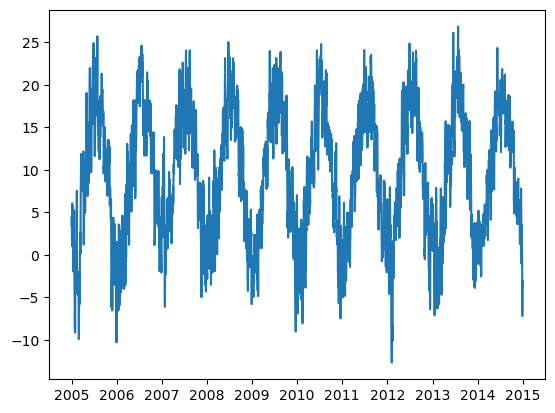

In [54]:
plt.plot(cha_daily['Date'], cha_daily['Ta'])

# Filter data

In [7]:
#Filter the daily data
cha_filtered=cha_daily[(cha_daily['VPD']>500) & (cha_daily['Ta']>15) & (cha_daily['Month'].isin([4, 5, 6, 7, 8, 9]))]
cha_filtered

,Date,Ta,VPD,GPP,SM,Year,Month,Day
144,2005-05-25,16.486125,541.790846,17.864453,0.387202,2005,5,25
145,2005-05-26,19.077437,654.859749,22.296063,0.369477,2005,5,26
146,2005-05-27,21.047333,690.378347,18.426551,0.359195,2005,5,27
147,2005-05-28,21.948625,772.772026,16.346551,0.348879,2005,5,28
148,2005-05-29,21.980708,723.018001,11.235079,0.347644,2005,5,29
...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,12.417782,0.397040,2014,7,31
3499,2014-08-01,18.754167,540.735582,8.104036,0.374618,2014,8,1
3506,2014-08-08,20.871021,506.666300,16.766637,0.357113,2014,8,8
3507,2014-08-09,20.869417,542.470531,3.225505,0.350901,2014,8,9


There are 556 observations/days between 2005 and 2014 respecting our three conditions.

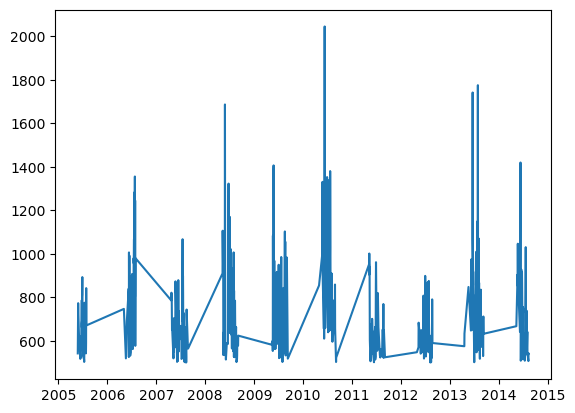

In [55]:
plt.plot(cha_filtered['Date'], cha_filtered['VPD'])

# Divide VPD and SM in bins

{'whiskers': [<matplotlib.lines.Line2D at 0x1925c0c4080>,
 'caps': [<matplotlib.lines.Line2D at 0x1925c0c4500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1925c093dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1925c0c4a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1925c0c4d40>],
 'means': []}

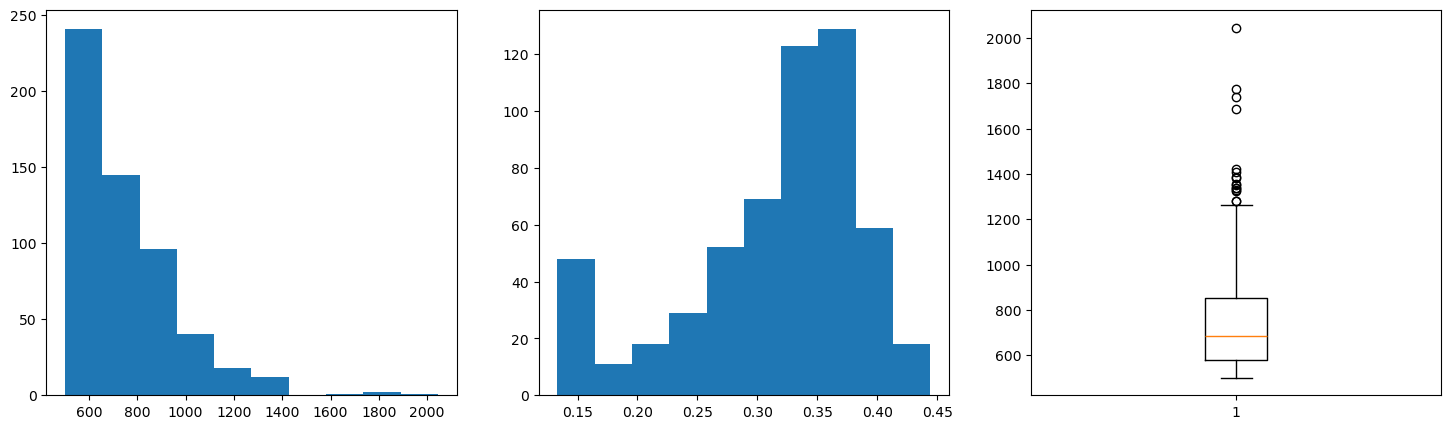

In [82]:
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_filtered['VPD'])
plt.subplot(1, 3, 2)
plt.hist(cha_filtered['SM'])
plt.subplot(1, 3, 3)
plt.boxplot(cha_filtered['VPD'])

In [8]:
#Divide in bins
cha_filtered = cha_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_filtered['SM_bin'] = pd.qcut(cha_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_filtered['VPD_bin'] = pd.qcut(cha_filtered['VPD'], q=10, labels=False) + 1
cha_filtered

,Date,Ta,VPD,GPP,SM,Year,Month,Day,SM_bin,VPD_bin
144,2005-05-25,16.486125,541.790846,17.864453,0.387202,2005,5,25,9,2
145,2005-05-26,19.077437,654.859749,22.296063,0.369477,2005,5,26,8,5
146,2005-05-27,21.047333,690.378347,18.426551,0.359195,2005,5,27,7,6
147,2005-05-28,21.948625,772.772026,16.346551,0.348879,2005,5,28,7,7
148,2005-05-29,21.980708,723.018001,11.235079,0.347644,2005,5,29,6,6
...,...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,12.417782,0.397040,2014,7,31,10,4
3499,2014-08-01,18.754167,540.735582,8.104036,0.374618,2014,8,1,9,2
3506,2014-08-08,20.871021,506.666300,16.766637,0.357113,2014,8,8,7,1
3507,2014-08-09,20.869417,542.470531,3.225505,0.350901,2014,8,9,7,2


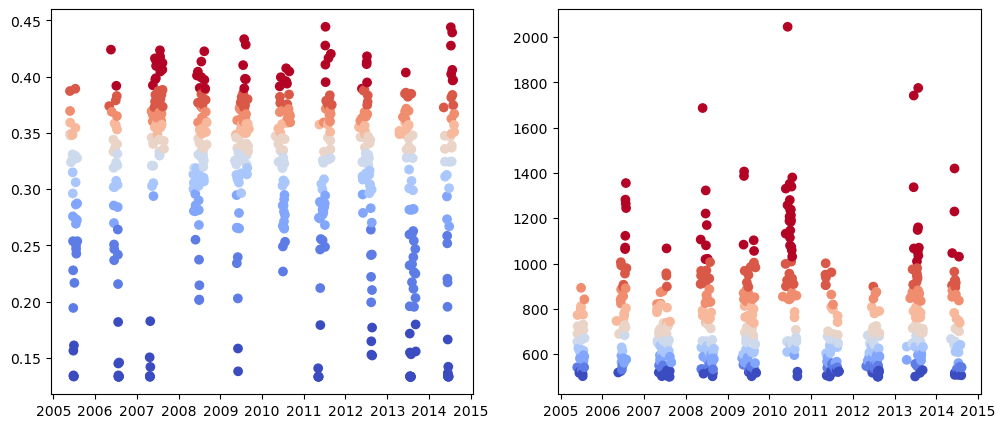

In [10]:
# verification
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['SM'],c=cha_filtered['SM_bin'], cmap='coolwarm')
plt.subplot(1,2,2)

plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['VPD'],c=cha_filtered['VPD_bin'], cmap='coolwarm')

 # Relationships between GPP and VPD

Text(0, 0.5, 'GPP')

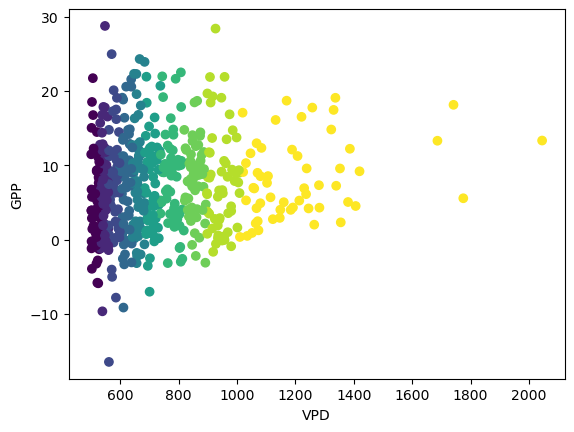

In [ ]:
plt.scatter(cha_filtered['VPD'], cha_filtered['GPP'], c=cha_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('GPP')

The relationship is not clear, we should maybe use a higher threshold.

C:\Users\moeag\AppData\Local\Temp\ipykernel_82784\3900971759.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


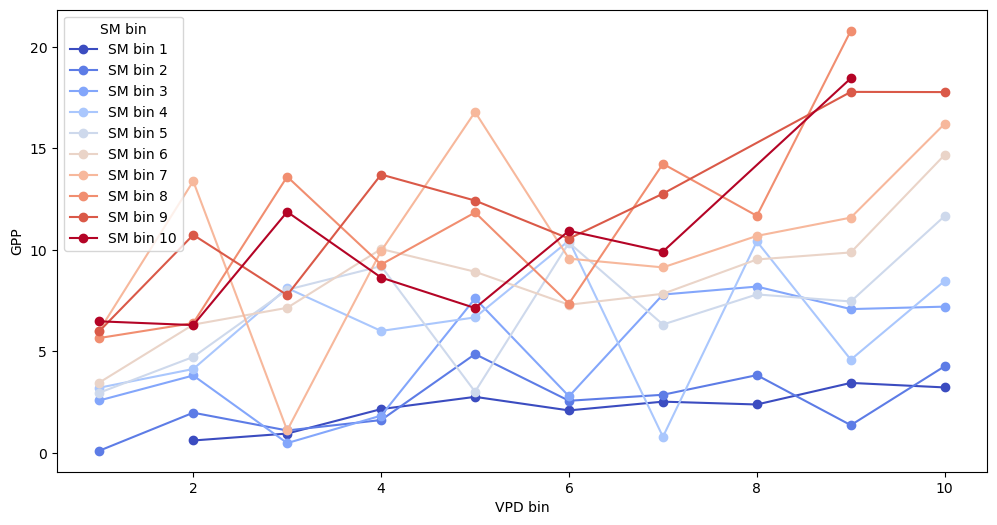

In [9]:
# for each combination of bins
grouped = cha_filtered.groupby(['SM_bin', 'VPD_bin'])['GPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('GPP')
plt.show()   

It is strange that GPP seems to increase with VPD

 # Relationships between GPP and soil moisture

Text(0, 0.5, 'GPP')

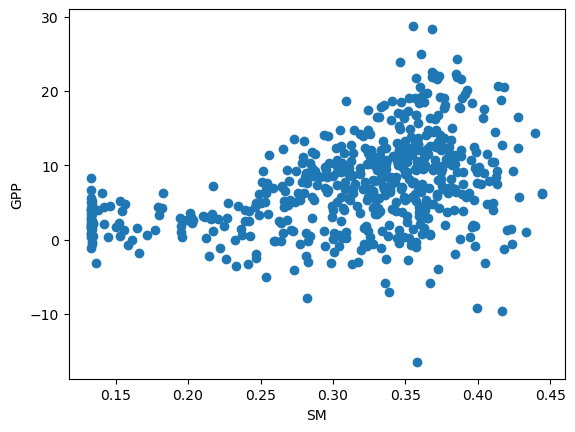

In [101]:
plt.scatter(cha_filtered['SM'], cha_filtered['GPP'])
plt.xlabel('SM')
plt.ylabel('GPP')

C:\Users\moeag\AppData\Local\Temp\ipykernel_60544\1653553456.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


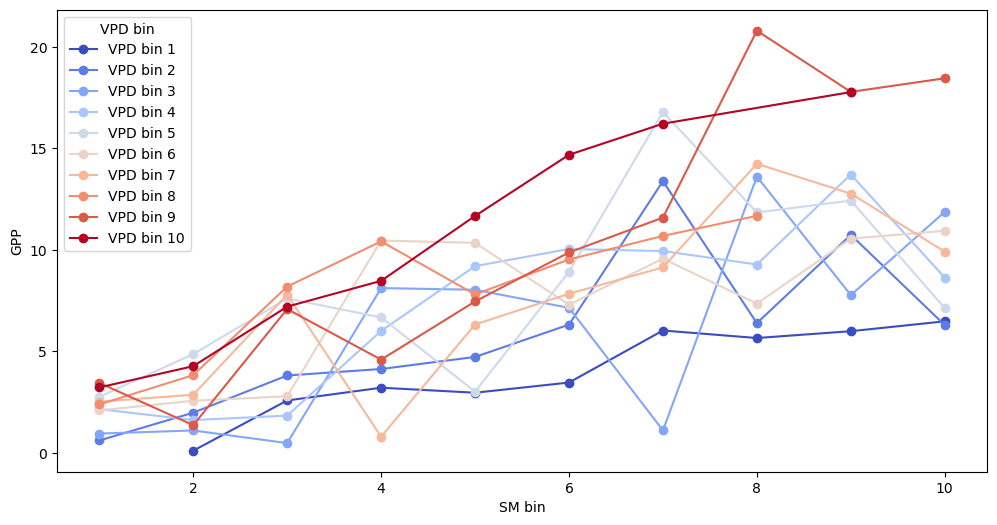

In [121]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('GPP')
plt.show() 

Here, soil moisture more discriminant than VPD. 

# Heatmap

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

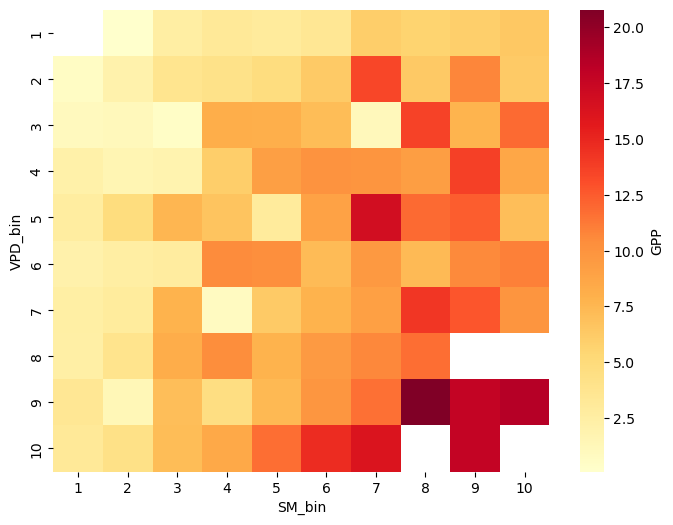

In [ ]:
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='GPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'GPP'}
)

It is strange that GPP seems to increase with VPD. However, we also see that SM is discriminant here.

# VPD limitation on GPP without coupling and same for SM (figure 3f, Liu et al.) TO IMPROVE

We used the approach 1 : we calculate the difference between SIF at the highest VPD bin and lowest VPD bin in each SM bin to derive the .SIF(VPD|SM) cf paper for the complete calcul

We could have used the 2nd approach, but we estimated that there were not enough points to do a linear regression, and it is the 1st approach that is shown in their paper.

However, considering the irregular relationship between GPP and VPD, we could have used approach 2 to smooth a bit, or a non linear approach

In [ ]:
# for each bin of SM, difference of GPP between max bin vpd and min bin vpd
delta_gpp_vpd = []
for sm_bin in sorted(grouped['SM_bin'].unique()):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    
    if not subset.empty:
        min_vpd_bin = subset['VPD_bin'].min()
        max_vpd_bin = subset['VPD_bin'].max()

        gpp_min = subset[subset['VPD_bin'] == min_vpd_bin]['GPP'].values
        gpp_max = subset[subset['VPD_bin'] == max_vpd_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_vpd.append({'SM_bin': sm_bin, 'delta_gpp_vpd': delta})

delta_gpp_vpd_df = pd.DataFrame(delta_gpp_vpd)

delta_gpp_vpd_df

,SM_bin,delta_gpp_vpd
0,1,2.614363
1,2,4.164804
2,3,4.623237
3,4,5.264993
4,5,8.709358
5,6,11.222955
6,7,10.189722
7,8,15.141427
8,9,11.781687
9,10,11.974750


In [ ]:
delta_gpp_sm = []

for vpd_bin in sorted(grouped['VPD_bin'].unique()):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    
    if not subset.empty:
        min_sm_bin = subset['SM_bin'].min()
        max_sm_bin = subset['SM_bin'].max()

        gpp_min = subset[subset['SM_bin'] == min_sm_bin]['GPP'].values
        gpp_max = subset[subset['SM_bin'] == max_sm_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_sm.append({'VPD_bin': vpd_bin, 'delta_gpp_sm': delta})

delta_gpp_sm_df = pd.DataFrame(delta_gpp_sm)

delta_gpp_sm_df

,VPD_bin,delta_gpp_sm
0,1,6.375977
1,2,5.685878
2,3,10.924427
3,4,6.481404
4,5,4.376720
5,6,8.850573
6,7,7.394696
7,8,9.293918
8,9,15.009371
9,10,14.552323


(1.6143634278038066, 16.14142710848528)

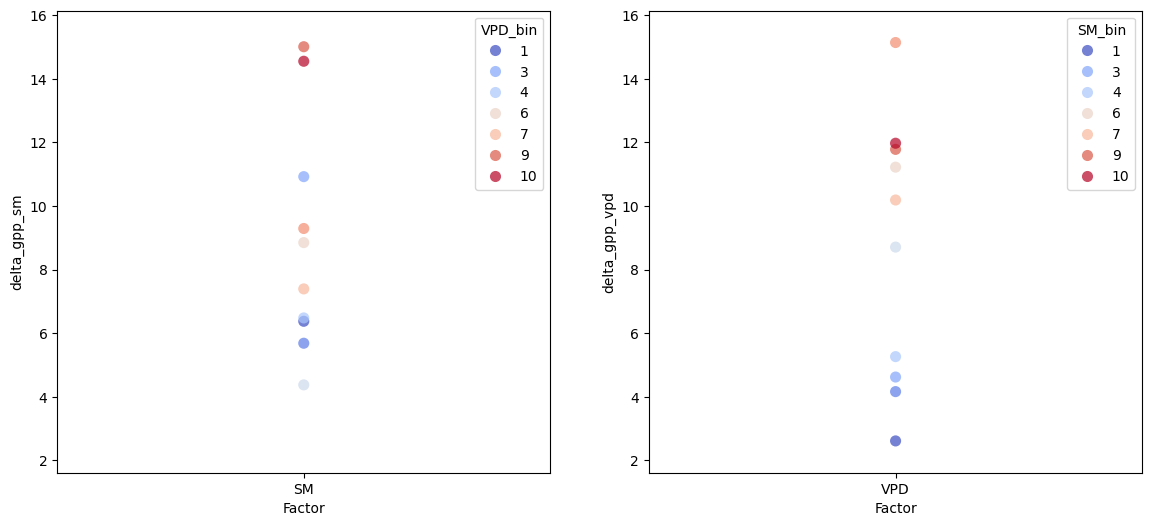

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour delta_gpp_sm en fonction des bins VPD
delta_gpp_sm_df['Factor'] = 'SM'
sns.stripplot(x='Factor', y='delta_gpp_sm', data=delta_gpp_sm_df, hue='VPD_bin', 
              palette='coolwarm', jitter=False,  size=8, alpha=0.7, ax=axes[0])

# Graphique pour delta_gpp_vpd en fonction des bins SM
delta_gpp_vpd_df['Factor'] = 'VPD'
sns.stripplot(x='Factor', y='delta_gpp_vpd', data=delta_gpp_vpd_df, hue='SM_bin', 
              palette='coolwarm', jitter=False, size=8, alpha=0.7, ax=axes[1])

#  même échelle
y_min = min(delta_gpp_sm_df['delta_gpp_sm'].min(), delta_gpp_vpd_df['delta_gpp_vpd'].min())
y_max = max(delta_gpp_sm_df['delta_gpp_sm'].max(), delta_gpp_vpd_df['delta_gpp_vpd'].max())

axes[0].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le premier graphique
axes[1].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le deuxième graphique


# Application to Laegeren

C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\610412991.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')


ValueError: Bin edges must be unique: Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype='float64', name='SM').
You can drop duplicate edges by setting the 'duplicates' kwarg

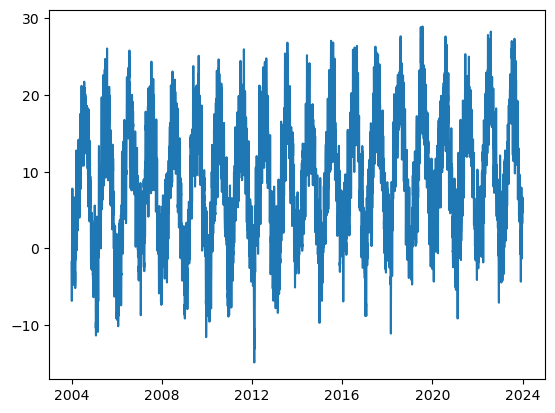

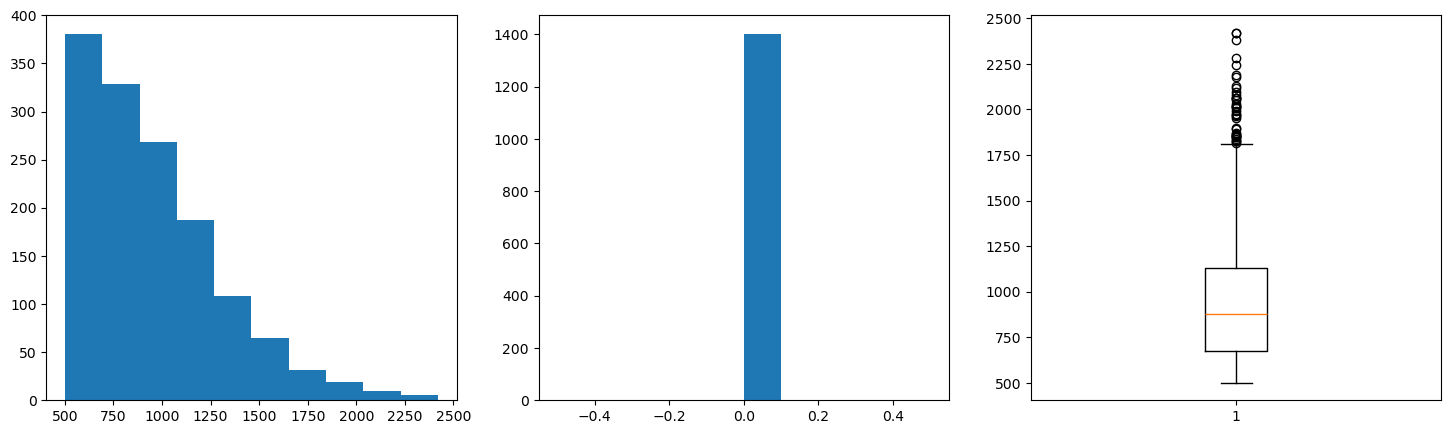

In [ ]:
## Load data
lae_mat= h5py.File("LAEGEREN.mat", 'r')
lae_mat

lae = pd.DataFrame(
    { 
        'GPP': lae_mat['Gfin'][:].squeeze(), #vérifier que le GPP est bon et son unité #we should maybe use NPP ? calculated each day with the T&C model
        'Ta': lae_mat['Ta'][:].squeeze(),
        'VPD': lae_mat['Ds'][:].squeeze(), #in Pa
        'SM': lae_mat['OF'][:].squeeze(), # first soil layer (surface)
        #'SIF':lae_mat['SIF_L'][:].squeeze() #lae=grassland--> low vegetation
    }
)

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')
lae['Date'] = date_range
lae['Date_day'] = lae['Date'].dt.date
lae['Year'] = lae['Date'].dt.year
lae['Month'] = lae['Date'].dt.month
lae['Day'] = lae['Date'].dt.day
lae['Hour'] = lae['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans laeMAU alors qu'elles vont jusqu'à 2023 dans les données de base
print(lae)


## Daily mean
# Groupby day to have daily mean
lae_daily = lae.groupby('Date_day')[['Ta','VPD', 'GPP','SM']].mean().reset_index()

#rearrange
lae_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
lae_daily['Date'] = pd.to_datetime(lae_daily['Date'])
lae_daily['Year'] = lae_daily['Date'].dt.year
lae_daily['Month'] = lae_daily['Date'].dt.month
lae_daily['Day'] = lae_daily['Date'].dt.day

plt.plot(lae_daily['Date'], lae_daily['Ta'])
plt.xlabel('Date')
plt.ylabel('Ta')


## Filter data
lae_filtered=lae_daily[(lae_daily['VPD']>500) & (lae_daily['Ta']>15) & (lae_daily['Month'].isin([4, 5, 6, 7, 8, 9]))]
print(lae_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(lae_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(lae_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(lae_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
lae_filtered = lae_filtered.copy() #to have an explicit copy (if not it raises an error)
lae_filtered['SM_bin'] = pd.qcut(lae_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
lae_filtered['VPD_bin'] = pd.qcut(lae_filtered['VPD'], q=10, labels=False) + 1
print(lae_filtered)

## Relationships between GPP and VPD
plt.scatter(lae_filtered['VPD'], lae_filtered['GPP'], c=lae_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('GPP')

# for each combination of bins
grouped = lae_filtered.groupby(['SM_bin', 'VPD_bin'])['GPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('GPP')
plt.show()

## Relationship between GPP and soil moisture
plt.scatter(lae_filtered['SM'], lae_filtered['GPP'])
plt.xlabel('SM')
plt.ylabel('GPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('GPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='GPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'GPP'}
)


In [11]:
lae_filtered = lae_filtered.copy() #to have an explicit copy (if not it raises an error)
#lae_filtered['SM_bin'] = pd.qcut(lae_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
lae_filtered['VPD_bin'] = pd.qcut(lae_filtered['VPD'], q=10, labels=False) + 1
lae_filtered

,Date,Ta,VPD,GPP,SM,Year,Month,Day,VPD_bin
138,2004-05-18,16.444771,592.185033,0.0,0.0,2004,5,18,2
139,2004-05-19,16.604938,579.386340,0.0,0.0,2004,5,19,2
140,2004-05-20,17.545771,619.176780,0.0,0.0,2004,5,20,2
158,2004-06-07,15.582583,529.238245,0.0,0.0,2004,6,7,1
159,2004-06-08,19.535813,651.842475,0.0,0.0,2004,6,8,3
...,...,...,...,...,...,...,...,...,...
7202,2023-09-20,18.270813,602.722467,0.0,0.0,2023,9,20,2
7208,2023-09-26,15.724063,529.953674,0.0,0.0,2023,9,26,1
7209,2023-09-27,16.801021,535.780935,0.0,0.0,2023,9,27,1
7210,2023-09-28,18.899396,800.065238,0.0,0.0,2023,9,28,5


In [12]:
print(lae)

        GPP      Ta        VPD   SM                Date    Date_day  Year  \
0       0.0 -1.1580  45.228303  0.0 2004-01-01 00:00:00  2004-01-01  2004   
1       0.0 -1.1985  36.439442  0.0 2004-01-01 01:00:00  2004-01-01  2004   
2       0.0 -1.2895  33.900754  0.0 2004-01-01 02:00:00  2004-01-01  2004   
3       0.0 -1.2185  38.006055  0.0 2004-01-01 03:00:00  2004-01-01  2004   
4       0.0 -1.3365  31.382655  0.0 2004-01-01 04:00:00  2004-01-01  2004   
...     ...     ...        ...  ...                 ...         ...   ...   
175315  0.0  1.2230   0.013351  0.0 2023-12-31 19:00:00  2023-12-31  2023   
175316  0.0  0.8505   0.012997  0.0 2023-12-31 20:00:00  2023-12-31  2023   
175317  0.0  0.9725   0.013112  0.0 2023-12-31 21:00:00  2023-12-31  2023   
175318  0.0  1.3240   0.013449  0.0 2023-12-31 22:00:00  2023-12-31  2023   
175319  0.0  1.3865   0.013510  0.0 2023-12-31 23:00:00  2023-12-31  2023   

        Month  Day  Hour  
0           1    1     0  
1           1    1   

# Application to Davos